In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("heart_disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [ ]:
EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


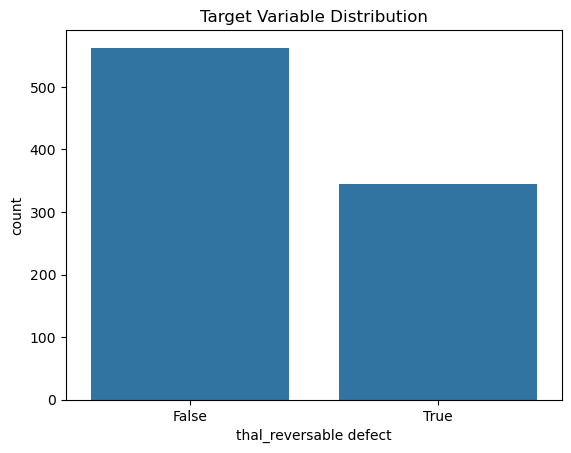

In [36]:
target_col = df.columns[-1]
sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution")
plt.show()

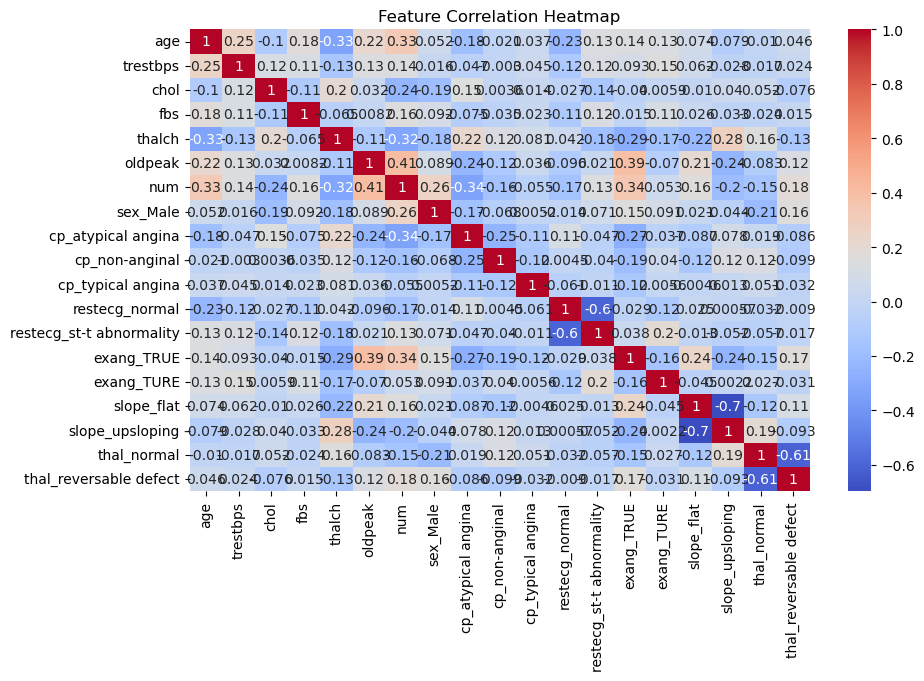

In [31]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
Feature Enginnering

In [16]:
# Check categorical columns (if any, encode them)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [17]:
# Handle missing values if present (fill with median)
df = df.fillna(df.median())

In [18]:
# Split features and target
X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]

In [ ]:
Decision Tree Classification

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

In [22]:
# Train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Predictions
y_pred = dt_model.predict(X_test)

In [24]:
# Evaluation metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_pred)
}
pd.DataFrame(metrics, index=["Decision Tree"])

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Decision Tree,0.67033,0.532468,0.630769,0.577465,0.661538


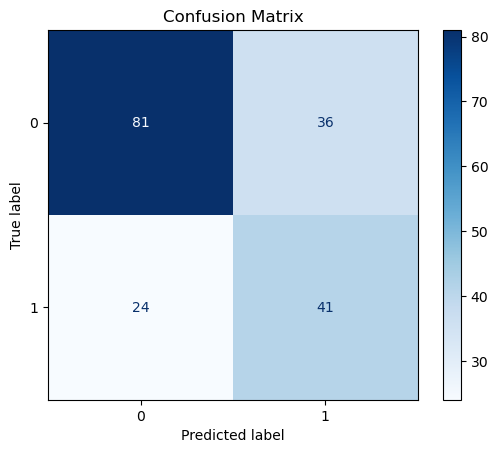

In [25]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
Hyperparameter Tuning

In [26]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring="accuracy",
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [29]:
# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
best_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best),
    "Recall": recall_score(y_test, y_pred_best),
    "F1 Score": f1_score(y_test, y_pred_best),
    "ROC-AUC": roc_auc_score(y_test, y_pred_best)
}
pd.DataFrame(best_metrics, index=["Best Decision Tree"])

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Best Decision Tree,0.71978,0.560345,1.0,0.718232,0.782051


In [ ]:
Visualize Decision Tree

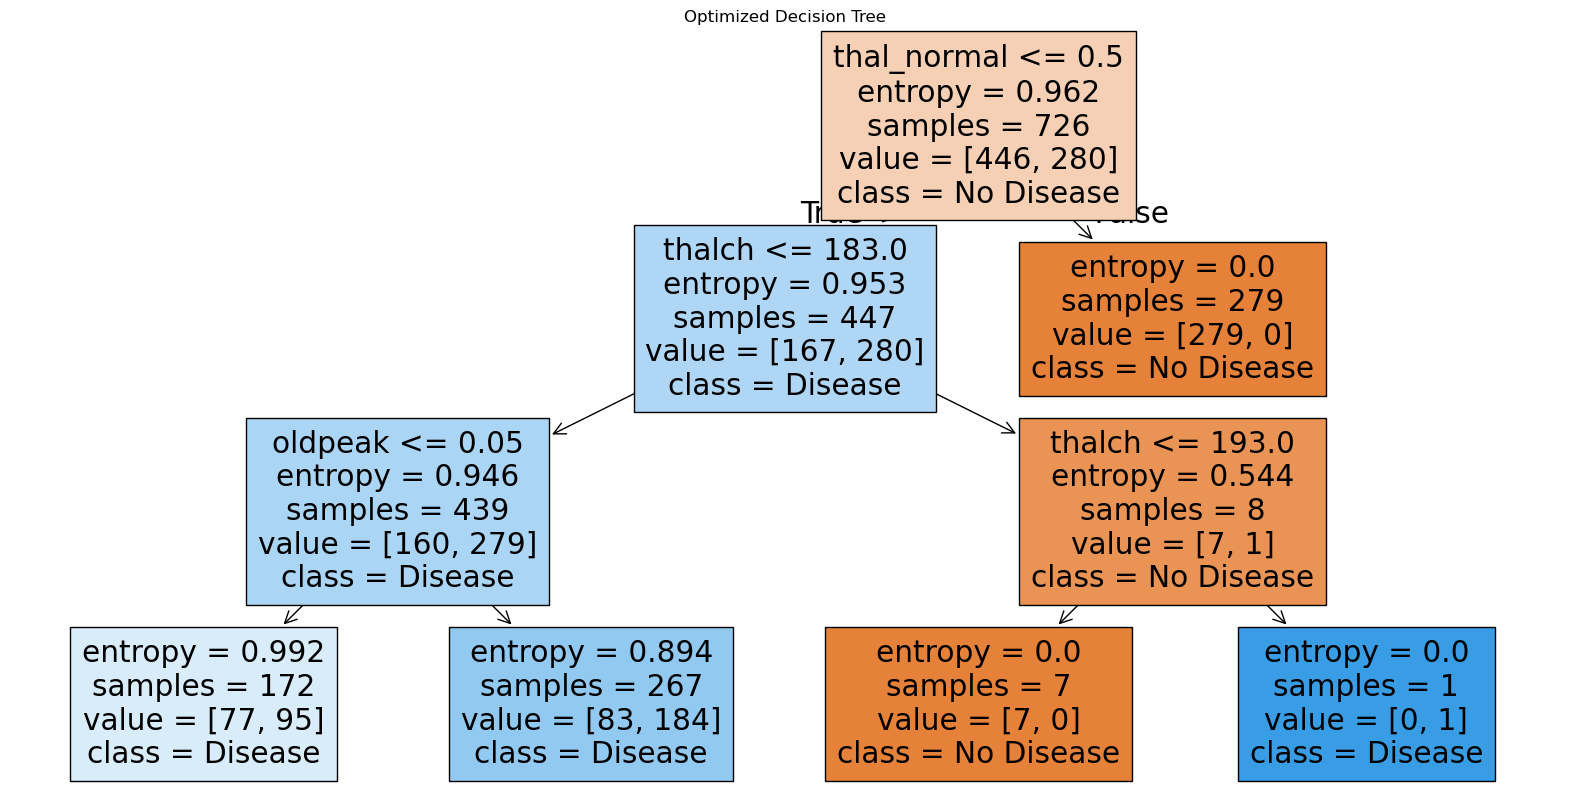

In [30]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Optimized Decision Tree")
plt.show()

In [ ]:
SUMMARY

In [ ]:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans Common Hyperparameters of Decision Tree Models and Their Impact

max_depth : Controls the maximum depth of the tree (how many levels it can grow).

Effect:A deeper tree can capture more complex patterns but risks overfitting.

A shallow tree may underfit, missing important relationships.

min_samples_split : Minimum number of samples required to split a node.

Effect: Larger values prevent the tree from creating too many small branches, leading to a more generalized model.

Very small values allow splits on very few samples, which can cause overfitting.

min_samples_leaf: Minimum number of samples required at a leaf node.

Effect: Higher values smooth the model, ensuring leaves have enough data points for reliable predictions.

Too small values increase risk of noisy or unstable splits.

criterion (e.g., "gini", "entropy")

Defines the function used to measure the quality of a split.

Effect: "gini" is faster and tends to work well in most cases.

"entropy" can give slightly better splits in some datasets but is computationally heavier.

max_features: Number of features to consider when looking for the best split.

Effect:Reduces correlation between trees in ensemble methods like Random Forests.

Lower values make the model more robust and generalizable.

max_leaf_nodes

Maximum number of leaf nodes allowed.

Effect: Limits the tree size, controlling complexity.

Helps prevent overfitting by restricting excessive branching.

In [ ]:
2.What is the difference between the Label encoding and One-hot encoding?
Ans Label Encoding :Assigns each category in a feature a unique integer value.

Example: {"Red": 0, "Green": 1, "Blue": 2}

Effect: Simple and efficient (requires less memory).

But it introduces an artificial ordinal relationship (e.g., Blue > Green), which can mislead models that assume numerical order (like linear regression).

One-Hot Encoding: Creates a new binary column for each category, marking presence with 1 and absence with 0.

Example:

Red → [1, 0, 0]

Green → [0, 1, 0]

Blue → [0, 0, 1]

Effect:

Avoids false ordinal relationships.

Increases dimensionality (can lead to “curse of dimensionality” if many categories).
